In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [6]:
data = load_digits()
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [18]:
data.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

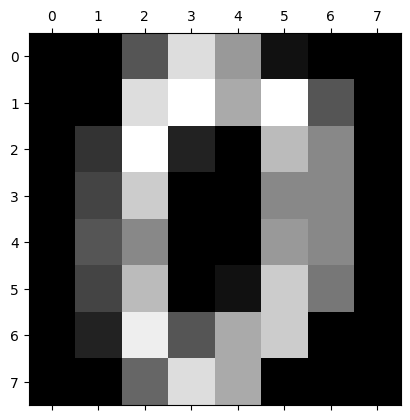

In [20]:
plt.gray()
plt.matshow(data.images[0])

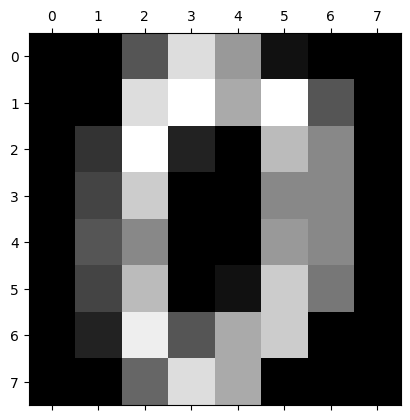

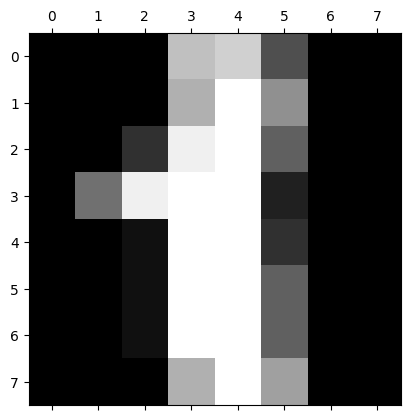

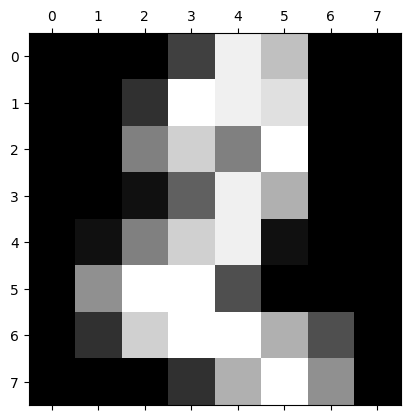

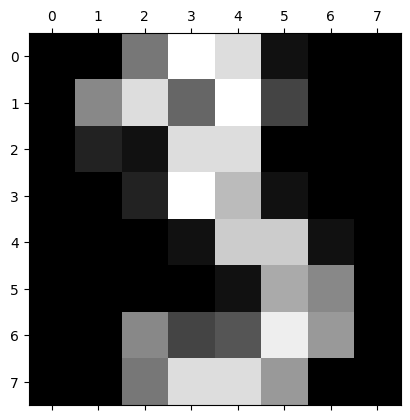

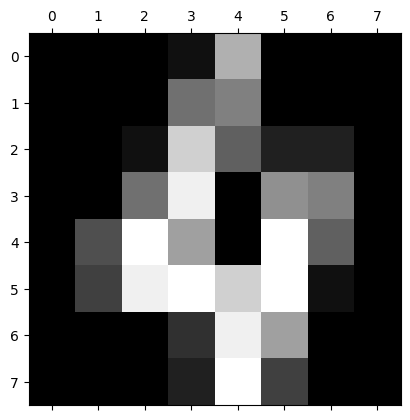

In [23]:
for i in range(5):
    plt.matshow(data.images[i])

In [24]:
data.target[0:5]

array([0, 1, 2, 3, 4])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

In [26]:
len(X_test)

360

In [27]:
len(X_train)

1437

# Model Training and Prediction

In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
model.predict([data.data[67]])

array([6])

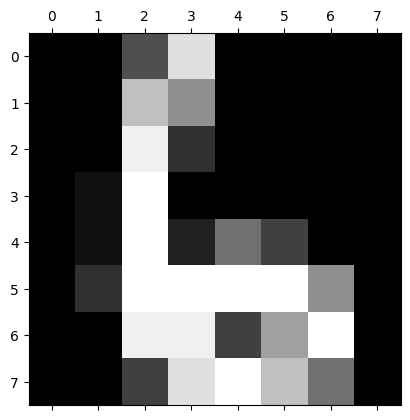

In [40]:
plt.matshow(data.images[67])

In [43]:
model.predict(data.data[0:5])

array([0, 1, 2, 3, 4])

In [46]:
predict = model.predict(X_test)

In [48]:
for i in range(len(predict)):
    print(f"Actual: {y_test[i]}, Predicted: {predict[i]}")

Actual: 6, Predicted: 6
Actual: 3, Predicted: 3
Actual: 4, Predicted: 4
Actual: 7, Predicted: 7
Actual: 8, Predicted: 5
Actual: 1, Predicted: 1
Actual: 7, Predicted: 7
Actual: 1, Predicted: 1
Actual: 4, Predicted: 4
Actual: 9, Predicted: 9
Actual: 0, Predicted: 0
Actual: 1, Predicted: 4
Actual: 8, Predicted: 8
Actual: 0, Predicted: 0
Actual: 9, Predicted: 9
Actual: 6, Predicted: 6
Actual: 3, Predicted: 3
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 2, Predicted: 2
Actual: 5, Predicted: 5
Actual: 5, Predicted: 5
Actual: 2, Predicted: 2
Actual: 2, Predicted: 2
Actual: 3, Predicted: 3
Actual: 2, Predicted: 2
Actual: 9, Predicted: 9
Actual: 5, Predicted: 5
Actual: 0, Predicted: 0
Actual: 2, Predicted: 2
Actual: 3, Predicted: 3
Actual: 3, Predicted: 3
Actual: 0, Predicted: 0
Actual: 3, Predicted: 3
Actual: 7, Predicted: 7
Actual: 9, Predicted: 9
Actual: 2, Predicted: 2
Actual: 0, Predicted: 0
Actual: 5, Predicted: 5
Actual: 4, Predicted: 4
Actual: 1, Predicted: 1
Actual: 3, Predi

In [49]:
print(f"Num of wrong predictions: {np.sum(y_test != predict)}")

Num of wrong predictions: 17


In [52]:
model.score(X_test, y_test)

0.9527777777777777

In [53]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix

In [54]:
cm = confusion_matrix(y_test, predict)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  1,  1,  0,  0,  0,  0,  0],
       [ 0,  1, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 28,  0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0, 39,  0,  1,  1,  0,  0],
       [ 1,  0,  1,  0,  0, 34,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  1,  0,  0,  0,  2,  0,  0, 30,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 37]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual')

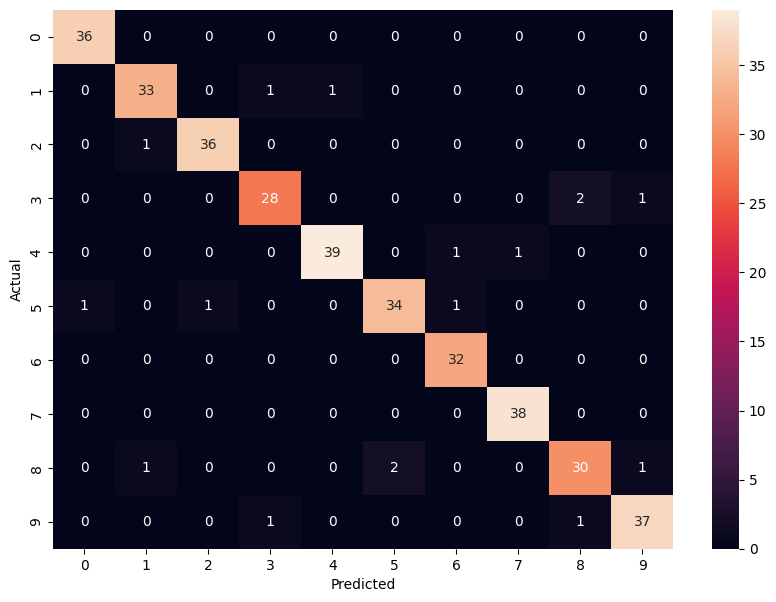

In [59]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")